In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('shopping_trends.csv')  # Replace 'your_dataset.csv' with the actual file path

# Display basic information about the dataset
print(data.info())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Handle categorical variables (encode them using one-hot encoding)
categorical_cols = ['Gender', 'Category', 'Season', 'Subscription Status', 
                    'Payment Method', 'Shipping Type', 'Discount Applied', 
                    'Promo Code Used', 'Frequency of Purchases']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Select features and target
X = data_encoded.drop(columns=['Customer ID', 'Purchase Amount (USD)', 'Item Purchased', 
                              'Location', 'Size', 'Color', 'Preferred Payment Method'])  # Drop irrelevant or redundant columns
y = data_encoded['Purchase Amount (USD)']

# Normalize numerical features
numerical_cols = ['Age', 'Previous Purchases', 'Review Rating']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

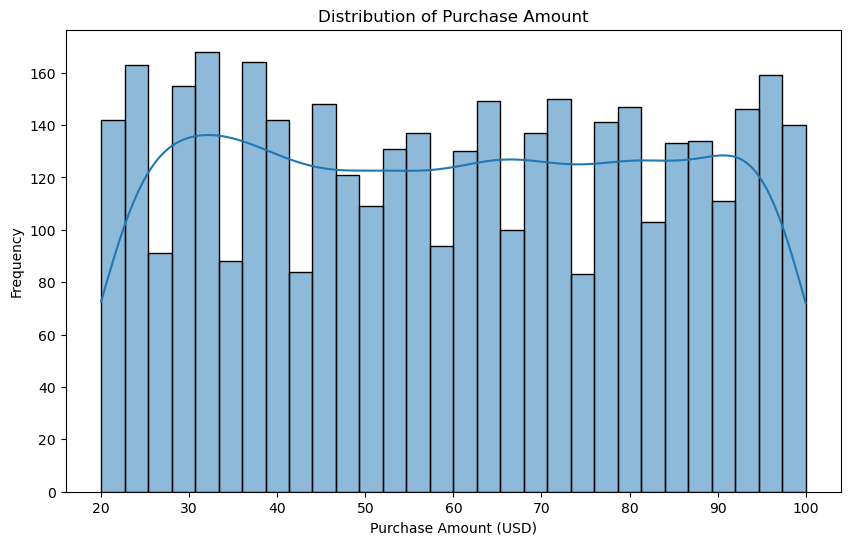

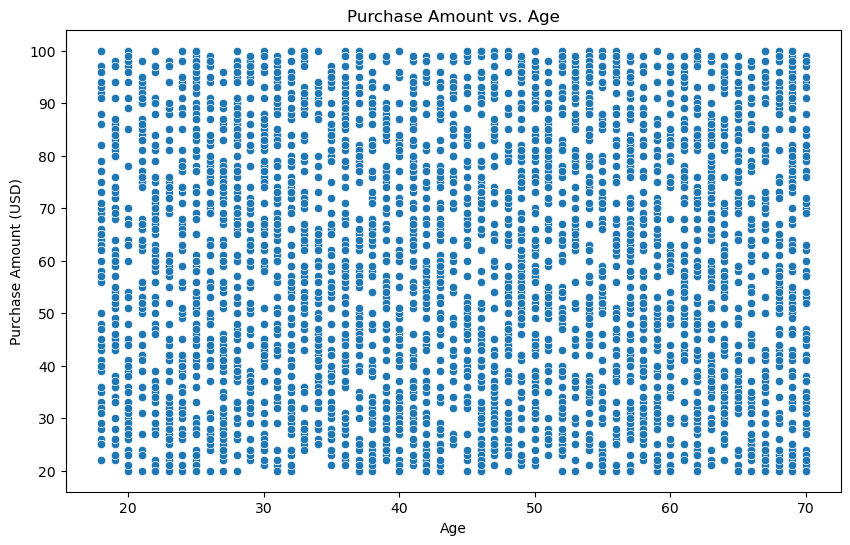

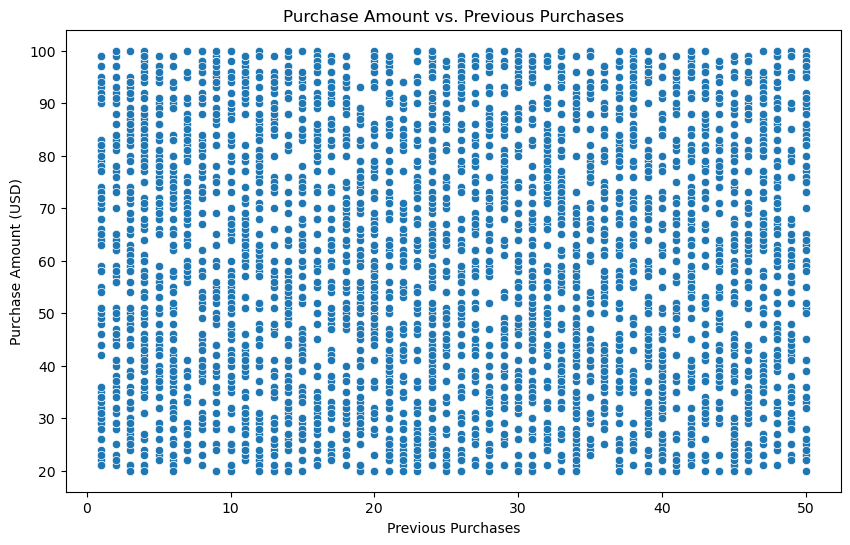

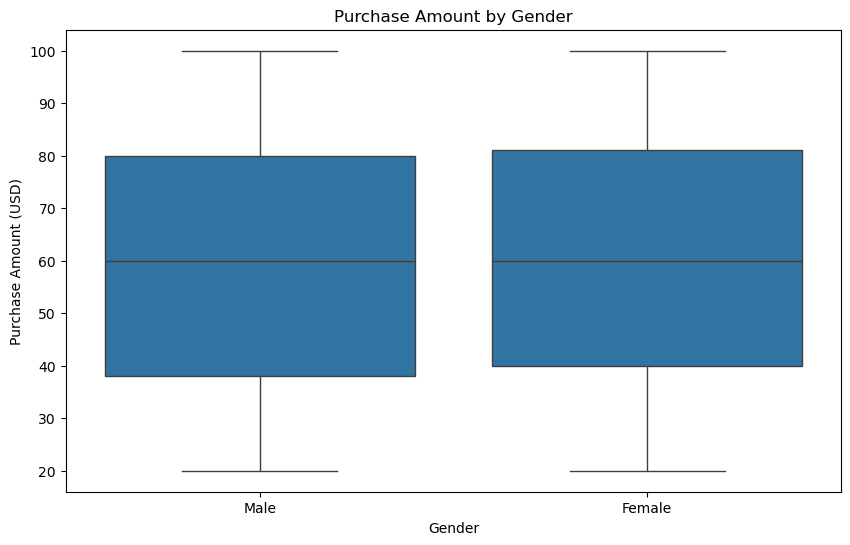

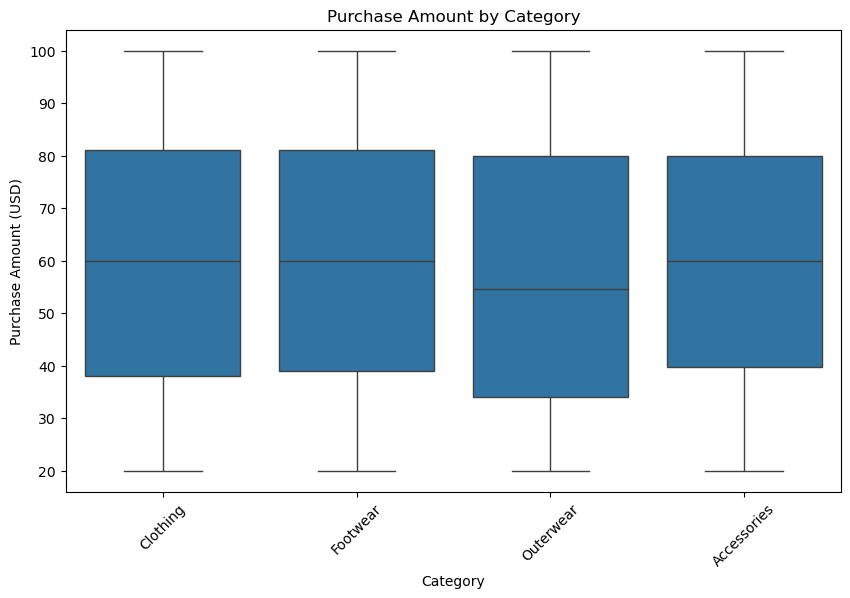

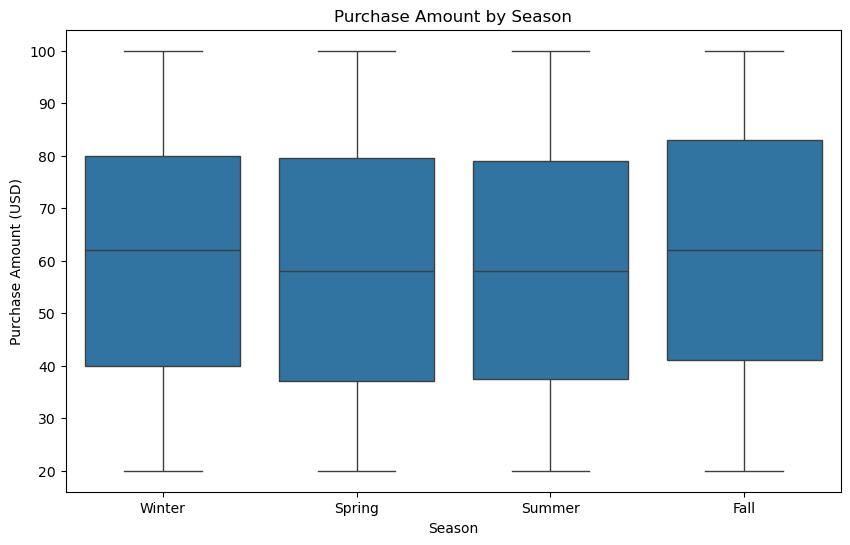

In [3]:
# Visualize the distribution of Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Visualize relationships between Purchase Amount and numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount vs. Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Previous Purchases', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount vs. Previous Purchases')
plt.show()

# Visualize Purchase Amount by categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=data)
plt.title('Purchase Amount by Season')
plt.show()

In [5]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {lr_mae:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R-squared: {lr_r2:.2f}")

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"MAE: {rf_mae:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"R-squared: {rf_r2:.2f}")

# Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top 10 most important features
print("\nTop 10 Most Important Features (Random Forest):")
print(feature_importance.head(10))

Linear Regression Performance:
MAE: 20.71
RMSE: 23.75
R-squared: -0.01

Random Forest Regressor Performance:
MAE: 21.05
RMSE: 24.14
R-squared: -0.04

Top 10 Most Important Features (Random Forest):
                             Feature  Importance
2                 Previous Purchases    0.186392
0                                Age    0.177887
1                      Review Rating    0.157314
4                  Category_Clothing    0.025665
3                        Gender_Male    0.022186
23  Frequency of Purchases_Bi-Weekly    0.020606
16             Shipping Type_Express    0.020169
9                      Season_Winter    0.020125
17       Shipping Type_Free Shipping    0.019815
7                      Season_Spring    0.019590


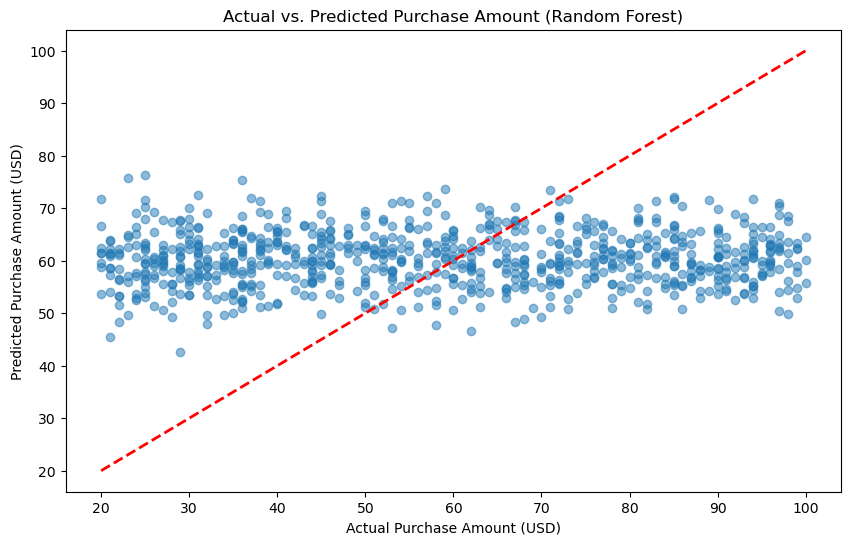

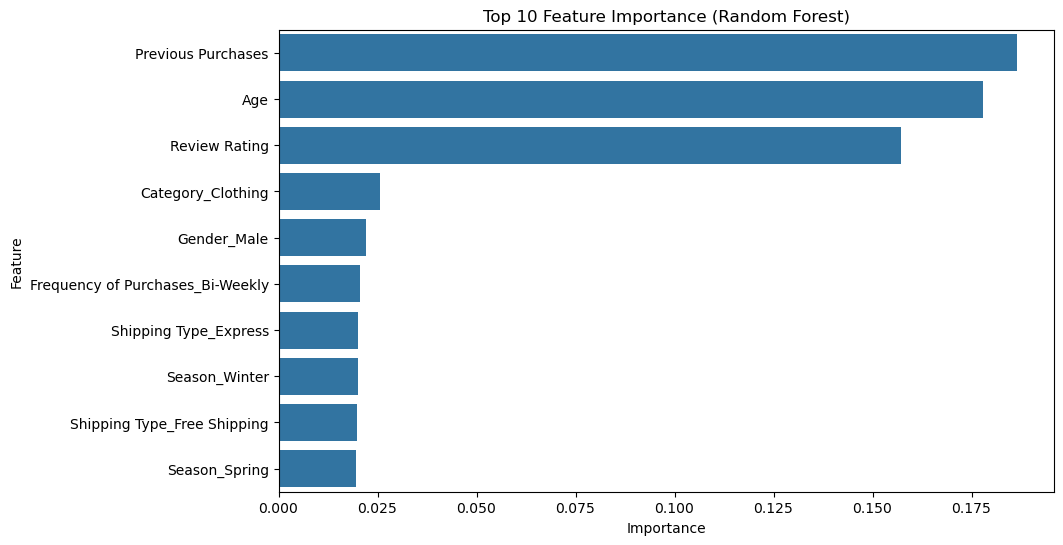

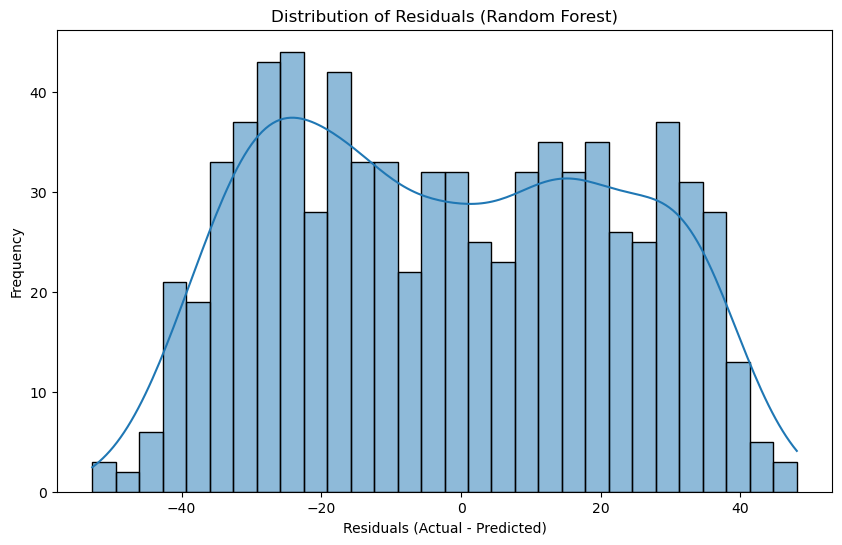

In [7]:
# Plot actual vs. predicted values (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Purchase Amount (Random Forest)')
plt.xlabel('Actual Purchase Amount (USD)')
plt.ylabel('Predicted Purchase Amount (USD)')
plt.show()

# Plot feature importance (Random Forest)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

# Residual plot (Random Forest)
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()